## Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv('Cust_Spend_Data.csv')

In [4]:
df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [14]:
from sklearn.preprocessing import scale as scale

scaled_RCF = scale(df.ix[:,2:7])
scaled_RCF

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 1.88649751, -1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [ 0.78756692, -0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 0.78756692,  1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.60441182,  0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 0.42125673,  1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.31136367, -0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [-0.86082896,  0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.86082896, -0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.04398406, -1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [-1.41029426,  0.        , -0.65465367, -0.74143264,  1.03509834]])

In [20]:
scaled_RCF = df.ix[:,2:7].apply(
    lambda x: (x- x.mean())/x.std())
scaled_RCF

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.789689,-1.176697,1.449138,-0.703385,-1.309307
1,0.747152,-0.588348,-0.621059,1.214937,1.636634
2,0.747152,1.765045,1.449138,-0.277091,0.000000
3,0.573395,0.588348,1.449138,-0.703385,0.000000
4,0.399639,1.176697,-0.621059,1.641231,-0.327327
5,-0.295386,-0.588348,-0.621059,-0.703385,1.309307
6,-0.816654,0.588348,-0.621059,1.428084,-0.654654
7,-0.816654,-0.588348,-0.621059,-0.703385,-0.981981
8,-0.990410,-1.176697,-0.621059,-0.490238,-0.654654
9,-1.337923,0.000000,-0.621059,-0.703385,0.981981


### Without Scaling the variables

In [39]:
from scipy.spatial.distance import pdist,squareform
pdist
#help(pdist)
d_euc = pdist(df.ix[:,2:7],metric="euclidean")

#Buliding Clusters
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
#help(linkage)
clus1 = linkage(d_euc, method="average")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


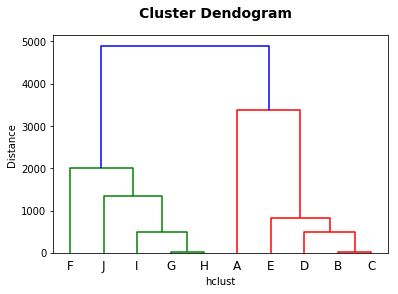

In [40]:
import matplotlib.pyplot as plt
dendrogram(clus1, labels=df.Name.values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendogram', fontweight='bold', fontsize=14);

### After Scaling the variables

In [41]:
from scipy.spatial.distance import pdist,squareform
pdist
#help(pdist)
d_euc = pdist(scaled_RCF,metric="euclidean")

In [51]:
#Buliding Clusters
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
#help(linkage)
clus1 = linkage(d_euc, method="average")

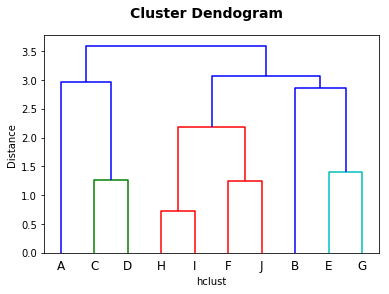

In [52]:
import matplotlib.pyplot as plt
dendrogram(clus1, labels=df.Name.values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendogram', fontweight='bold', fontsize=14);

In [32]:
df.Name

0    A
1    B
2    C
3    D
4    E
5    F
6    G
7    H
8    I
9    J
Name: Name, dtype: object

In [21]:
scaled_RCF

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.789689,-1.176697,1.449138,-0.703385,-1.309307
1,0.747152,-0.588348,-0.621059,1.214937,1.636634
2,0.747152,1.765045,1.449138,-0.277091,0.000000
3,0.573395,0.588348,1.449138,-0.703385,0.000000
4,0.399639,1.176697,-0.621059,1.641231,-0.327327
5,-0.295386,-0.588348,-0.621059,-0.703385,1.309307
6,-0.816654,0.588348,-0.621059,1.428084,-0.654654
7,-0.816654,-0.588348,-0.621059,-0.703385,-0.981981
8,-0.990410,-1.176697,-0.621059,-0.490238,-0.654654
9,-1.337923,0.000000,-0.621059,-0.703385,0.981981
